In [33]:
%matplotlib inline

<AxesSubplot:xlabel='time'>

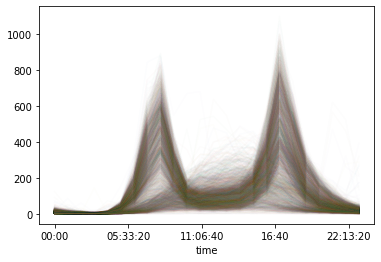

In [34]:
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

In [35]:
X = pivoted.fillna(0).T.values
X.shape

(3193, 24)

In [36]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [37]:
X2.shape

(3193, 2)

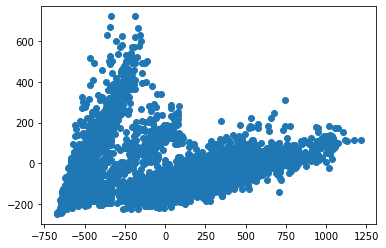

In [38]:
import matplotlib.pyplot as plt
plt.scatter(X2[:, 0], X2[:, 1])

In [39]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

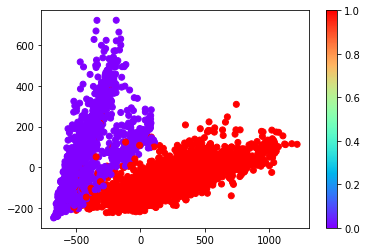

In [40]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

In [41]:
import sklearn
sklearn.__version__

'0.24.2'

In [42]:
pivoted.shape

(24, 3193)

<AxesSubplot:xlabel='time'>

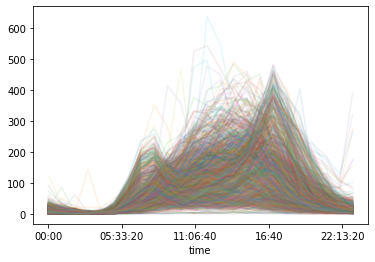

In [43]:
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1)

<AxesSubplot:xlabel='time'>

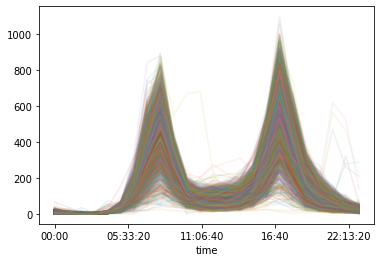

In [44]:
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1)

In [45]:
import pandas as pd
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

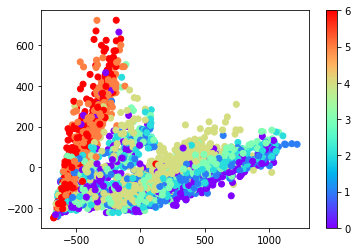

In [46]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

In [47]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2021-05-07', '2021-05-17', '2021-06-09', '2021-06-11',
               '2021-06-15', '2021-06-21', '2021-06-22', '2021-06-25',
               '2021-06-28', '2021-06-29'],
              dtype='datetime64[ns]', length=1879, freq=None)